---
title: "practice 1"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

Download <a href="fft_practice.zip" download>this zip</a> file before you start. It contains all required datasets for the fft practice pages.  
  
In this practice we will find the frequency of days and years from temperature data.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
import concurrent.futures
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import math
import scipy
from scipy.signal import find_peaks

# %matplotlib widget

Import data

In [2]:
df = pd.read_csv('shani_temperature.csv', index_col='datetime', parse_dates=True)
df

,T
datetime,
2000-01-01 00:00:00,16.791667
2000-01-01 02:00:00,16.975000
2000-01-01 04:00:00,16.825000
2000-01-01 06:00:00,17.050000
2000-01-01 08:00:00,19.900000
...,...
2020-12-31 14:00:00,17.341667
2020-12-31 16:00:00,14.900000
2020-12-31 18:00:00,13.308333


plot

<Axes: xlabel='datetime'>

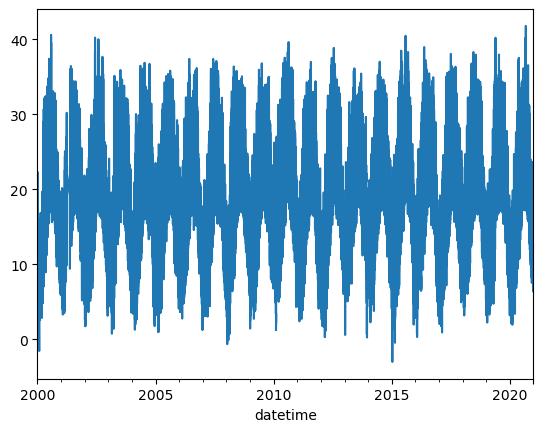

In [3]:
df['T'].plot()

### Apply FFT

In [4]:
dt = 1/12 # 2hr interval is like 1/12 of a day
dt = 2 # 2hr interval is like 1/12 of a day
N = len(df)
t = np.arange(0,int(len(df)),dt)
x = df['T'].values
# standardize x:
x = (x - np.mean(x))/np.std(x)

In [5]:
fft = scipy.fft.fft(x) / N
k = scipy.fft.fftfreq(N, dt)
fft_abs = np.abs(fft)

Keep only positive k values

In [6]:
fft_abs = fft_abs[k>=0]
k = k[k>=0]

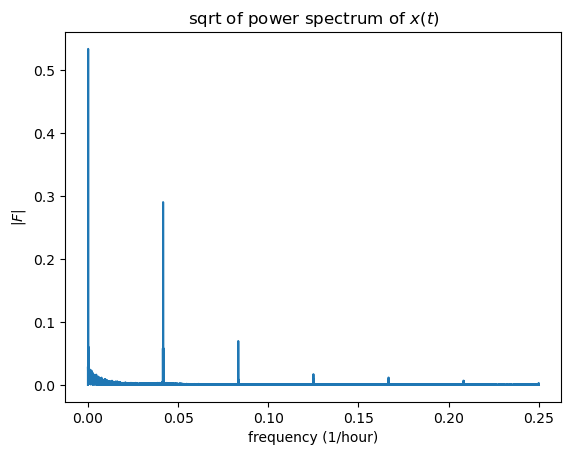

In [11]:
fig, ax = plt.subplots()
ax.plot(k, fft_abs)
ax.set(xlabel="frequency (1/hour)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$")

peak_freq = k[fft_abs.argmax()]
# print(f'Highest peak at {peak_freq:.5f} per day')
# print(f'If we divide 1 by that value we get {1/peak_freq:.2f} :)')
# print(f'Keep in mind that the resolution is {(np.median(np.diff(k))):.7f} per day')

The $k$ values are in $\frac{1}{hour}$ units, which are not that intuitive for finding the frequency of a year or days. If we compute `1/k` we will get a more intuitive unit of $\frac{\text{hour}}{\text{cycle}}$.

In [8]:
peaks, _ = find_peaks(fft_abs, threshold=0.05)

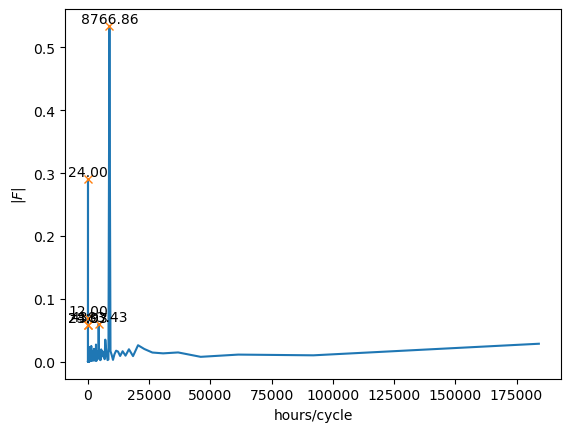

In [9]:
np.seterr(divide='ignore')

fig, ax = plt.subplots()
ax.plot(1/k, fft_abs)
ax.set(xlabel="hours/cycle",
       ylabel=r"$|F|$")
ax.plot(1/k[peaks], fft_abs[peaks], "x")
# ax.set_xlim(-50,450)
for peak in peaks:
    ax.text(1/k[peak], fft_abs[peak], f'{1/k[peak]:.2f}', ha='center', va='bottom')
None
# print(1/k[peaks])

We see a clear peak at 24 indicating that the fft detected a strong signal at 24 hrs per cycle, which is obviously the signal of a day. Now let's modify the units again to make them more intuitive for lower frequencies. We will divide by 24 to get the unit of $\frac{\text{day}}{\text{cycle}}$.

[365.28571429 182.64285714   1.0027451    1.           0.99726989
   0.5       ]


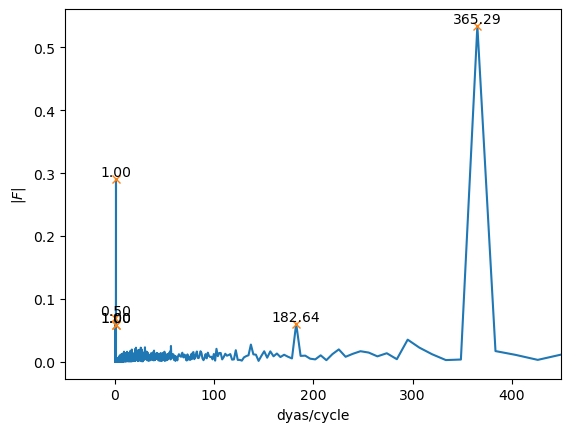

In [10]:
fig, ax = plt.subplots()
ax.plot(1/k/24, fft_abs)
ax.set(xlabel="dyas/cycle",
       ylabel=r"$|F|$")
ax.plot(1/k[peaks]/24, fft_abs[peaks], "x")
ax.set_xlim(-50,450)
for peak in peaks:
    ax.text(1/k[peak]/24, fft_abs[peak], f'{1/k[peak]/24:.2f}', ha='center', va='bottom')
None
print(1/k[peaks]/24)